In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)  #sets nice background color
import matplotlib.pyplot as pl
netflix =pd.read_csv('NetflixOriginals.csv', encoding="latin-1")

In [2]:
#Viewing first few rows of the dataset
print(netflix.head())
#We have 6 column entries and 584 rows
print(netflix.shape)
#To understand more about the datatypes
print(netflix.info())

             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  
(584, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64 

In [3]:
print(netflix.describe())
# 5-point summaey
#Average movie run time is 94 mins and average IMDB score is 6

# To find if there are any null values
print(pd.DataFrame( netflix.isnull().sum(), columns= ['Number of missing values']))
print()
netflix["Date"] = pd.to_datetime(netflix.Premiere)
print (netflix["Date"])

          Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000
            Number of missing values
Title                              0
Genre                              0
Premiere                           0
Runtime                            0
IMDB Score                         0
Language                           0

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Date, Length: 584, dtype: datetime64[ns]


In [4]:
print("---------------------------------------------------------------------------------")

netflix['Year'] = netflix['Date'].dt.year
netflix['Month'] = netflix['Date'].dt.month
netflix['Day'] = netflix['Date'].dt.day_of_week
print(netflix.head())

---------------------------------------------------------------------------------
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language       Date  Year  Month  Day  
0         2.5  English/Japanese 2019-08-05  2019      8    0  
1         2.6           Spanish 2020-08-21  2020      8    4  
2         2.6           Italian 2019-12-26  2019     12    3  
3         3.2           English 2018-01-19  2018      1    4  
4         3.4             Hindi 2020-10-30  2020     10    4  


In [5]:
print("---------------------------------------------------------------------------------")

#Hangi yılda en fazla film yayımlanmıştır?
year = netflix.Year.value_counts()
print(year)


---------------------------------------------------------------------------------
2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64


---------------------------------------------------------------------------------


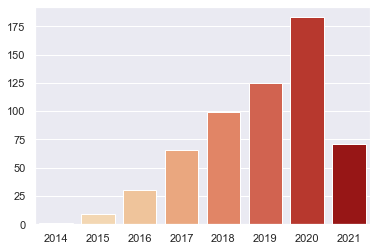

In [6]:
print("---------------------------------------------------------------------------------")

#En çok 2020 yılında yayınlanmıştır. Görselleştirilmiş hali
sns.barplot(x=year.index, y=year.values, palette="OrRd")
pl.show()


In [7]:
print("---------------------------------------------------------------------------------")

#Veri setinde kullanılan en popüler 3 dil
top_3_lang = netflix.Language.value_counts().nlargest(3)
print(top_3_lang)

---------------------------------------------------------------------------------
English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


In [8]:
print("---------------------------------------------------------------------------------")

#IMDB Puanı en yüksek olan ilk 10 film
top_10_movies = netflix[["IMDB Score", "Title",]].sort_values(["IMDB Score"], ascending=False)[:10]
print(top_10_movies)

---------------------------------------------------------------------------------
     IMDB Score                                        Title
583         9.0     David Attenborough: A Life on Our Planet
582         8.6    Emicida: AmarElo - It's All For Yesterday
581         8.5                      Springsteen on Broadway
580         8.4  Winter on Fire: Ukraine's Fight for Freedom
579         8.4        Taylor Swift: Reputation Stadium Tour
578         8.4   Ben Platt: Live from Radio City Music Hall
577         8.3                       Dancing with the Birds
576         8.3                      Cuba and the Cameraman 
573         8.2                                        Klaus
571         8.2                                         13th


In [9]:
print("---------------------------------------------------------------------------------")

#IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
print(netflix.groupby("Genre")["IMDB Score"].mean().nlargest(10))

---------------------------------------------------------------------------------
Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
Historical drama                        7.200000
Name: IMDB Score, dtype: float64


---------------------------------------------------------------------------------


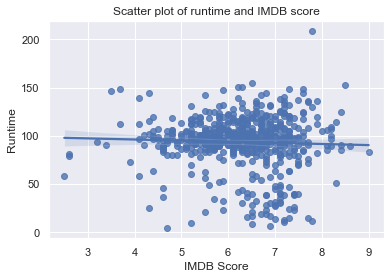

In [10]:
print("---------------------------------------------------------------------------------")

#IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
sns.regplot(data=netflix,x='IMDB Score',y='Runtime');
pl.title('Scatter plot of runtime and IMDB score');
pl.show()


In [11]:
print("---------------------------------------------------------------------------------")

#'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
top_10_runtime = netflix[["Title", "Runtime"]].sort_values(["Runtime"], ascending=False)[:10]
print(top_10_runtime)

---------------------------------------------------------------------------------
                               Title  Runtime
561                     The Irishman      209
328                      Da 5 Bloods      155
581          Springsteen on Broadway      153
247                         Citation      151
284               The Forest of Love      151
509                   Raat Akeli Hai      149
7    The Last Days of American Crime      149
543                             Ludo      149
194                 Army of the Dead      148
5                              Drive      147


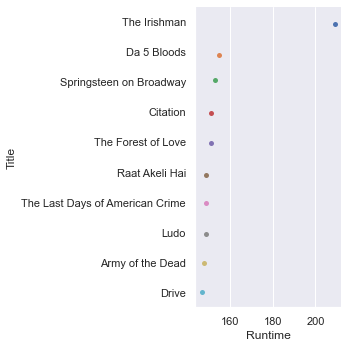

In [12]:
#Görsel Hali
sns.catplot(data = top_10_runtime, x='Runtime', y='Title')
pl.show()

In [13]:
print("---------------------------------------------------------------------------------")

#Genre kategorisi kaç tane
print(netflix['Genre'].nunique())

print("---------------------------------------------------------------------------------")

#Genre Kategorileri Nelerdir
print(netflix['Genre'].unique())


---------------------------------------------------------------------------------
115
---------------------------------------------------------------------------------
['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian

In [14]:
print("---------------------------------------------------------------------------------")

#IMDB Puanı en düşük olan 10 film ve dili
imdblanguage=(netflix.groupby("Language")["IMDB Score"].mean().nsmallest(10))
print(imdblanguage)

---------------------------------------------------------------------------------
Language
Malay               4.200000
English/Japanese    4.400000
Filipino            5.100000
Norwegian           5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Name: IMDB Score, dtype: float64


---------------------------------------------------------------------------------


[Text(0, 0.5, 'Language'), Text(0.5, 0, 'IMDB scores')]

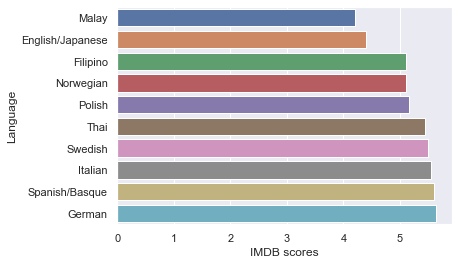

In [15]:
print("---------------------------------------------------------------------------------")

#IMDB Puanı en düşük olan 10 film ve dili. Görselleştirilmiş hali
imdblanguageplot = sns.barplot(x=imdblanguage.values, y=imdblanguage.index, orient='h')
imdblanguageplot.set(ylabel="Language",
       xlabel="IMDB scores")


       Year                             Title  Runtime
304  2014.0                        My Own Man     81.0
553  2015.0               Beasts of No Nation    136.0
387  2016.0  Tony Robbins: I Am Not Your Guru    116.0
481  2017.0       First They Killed My Father    136.0
581  2018.0           Springsteen on Broadway    153.0
561  2019.0                      The Irishman    209.0
328  2020.0                       Da 5 Bloods    155.0
194  2021.0                  Army of the Dead    148.0


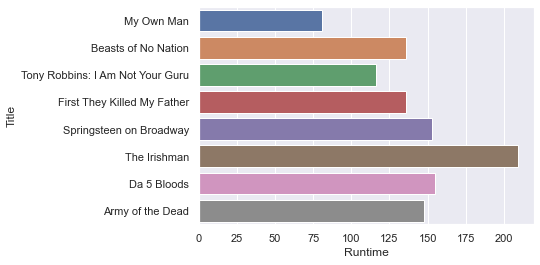

In [16]:
# Hangi yılın toplam "runtime" süresi en fazladır?
find_year_runtime = netflix[["Year","Title", "Runtime"]]
#print(find_year_runtime)
find_year_runtime_year_s = find_year_runtime.drop(find_year_runtime.index[0:])

for x in range(2014,2022):

    find_year_runtime_year = find_year_runtime.where(netflix['Year'] == x)
    find_year_runtime_year = find_year_runtime_year[["Year","Title", "Runtime"]].sort_values(["Runtime"], ascending=False)[:1]
    find_year_runtime_year_s = pd.concat([find_year_runtime_year_s, find_year_runtime_year])
print(find_year_runtime_year_s)


#print(runtime_high)
runtime_high_plot = sns.barplot(data = find_year_runtime_year_s, x='Runtime', y='Title')


       Year  IMDB Score                                      Title  \
0    2019.0         2.5                            Enter the Anime   
15   2019.0         4.3                             After the Raid   
20   2019.0         4.4          Hello Privilege. It's Me, Chelsea   
30   2019.0         4.6                                After Maria   
111  2019.0         5.5                       Ghosts of Sugar Land   
..      ...         ...                                        ...   
570  2020.0         8.1                             Rising Phoenix   
572  2020.0         8.2          Disclosure: Trans Lives on Screen   
575  2020.0         8.2      The Three Deaths of Marisela Escobedo   
582  2020.0         8.6  Emicida: AmarElo - It's All For Yesterday   
583  2020.0         9.0   David Attenborough: A Life on Our Planet   

           Genre  
0    Documentary  
15   Documentary  
20   Documentary  
30   Documentary  
111  Documentary  
..           ...  
570  Documentary  
572  Do

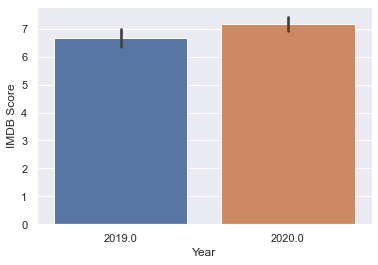

In [17]:
#-2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
find_Documentary = netflix.where(netflix['Genre'] == 'Documentary')
find_Documentary_imdb = find_Documentary[["Year", "IMDB Score", "Title", "Genre"]]
find_Documentary_imdb_2019 = find_Documentary_imdb.where(netflix['Year'] == 2019)
find_Documentary_imdb_2020 = find_Documentary_imdb.where(netflix['Year'] == 2020)

find_Documentary_imdb_year = pd.concat([find_Documentary_imdb_2019, find_Documentary_imdb_2020])
find_Documentary_imdb_year = find_Documentary_imdb_year.dropna()
print(find_Documentary_imdb_year)


find_Documentary_imdb_year_plot = sns.barplot(data = find_Documentary_imdb_year, x='Year', y='IMDB Score')

       Year Language                                  Title  Runtime
4    2020.0    Hindi                            Kaali Khuhi     90.0
5    2019.0    Hindi                                  Drive    147.0
9    2021.0    Hindi                     Sardar Ka Grandson    139.0
16   2020.0    Hindi                          Ghost Stories    144.0
23   2021.0    Hindi                  The Girl on the Train    120.0
45   2020.0    Hindi                     Mrs. Serial Killer    106.0
87   2020.0    Hindi         Gunjan Saxena: The Kargil Girl    112.0
97   2020.0    Hindi  Dolly Kitty and Those Twinkling Stars    120.0
100  2020.0    Hindi                                 Guilty    119.0
112  2019.0    Hindi                           House Arrest    104.0
147  2020.0    Hindi                       Ginny Weds Sunny    125.0
168  2020.0    Hindi                Choked: Paisa Bolta Hai    114.0
169  2020.0    Hindi                           Class of '83     98.0
176  2018.0    Hindi              

[Text(0.5, 0, 'average runtime'), Text(0, 0.5, 'Hindi Movie')]

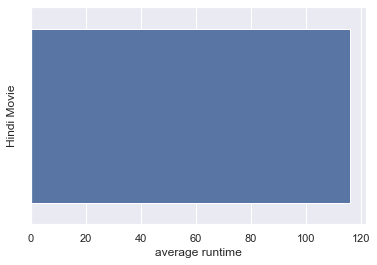

In [18]:
#'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
find_Hindi = netflix.where(netflix['Language'] == 'Hindi')
find_Hindi = find_Hindi[["Year", "Language", "Title", "Runtime"]].dropna()
average = find_Hindi[["Runtime"]].mean()

print(find_Hindi)

hindi_plot = sns.barplot(data = average, x=average)
hindi_plot.set(xlabel='average runtime', ylabel='Hindi Movie')

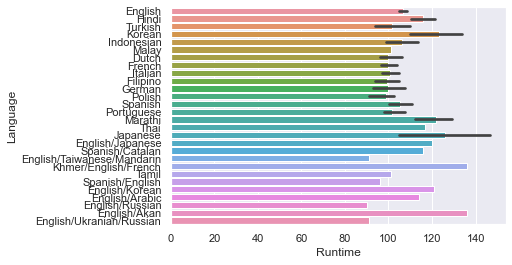

In [19]:
#-Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
#uzun soluklu film 90 ve üstü seçildi

find_long = netflix.where(netflix['Runtime'] >= 90)
find_long = find_long[["Language", "Title", "Runtime"]].dropna()

language_high_plot = sns.barplot(data = find_long, x='Runtime', y='Language')

In [20]:
#-İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
find_english_imdb = netflix.where(netflix['Language'] == 'English')
find_english_imdb = find_english_imdb[["Language", "Title", "IMDB Score"]].dropna()
maks = find_english_imdb.max()
print(maks)


Language      English
Title         Òlòt?ré
IMDB Score        9.0
dtype: object


In [21]:
#-Her bir dilin en fazla kullanıldığı "Genre" nedir?

find_genre = netflix[["Language", "Title", "Genre"]].dropna()
print(find_genre)



                     Language                                        Title  \
0            English/Japanese                              Enter the Anime   
1                     Spanish                                  Dark Forces   
2                     Italian                                      The App   
3                     English                               The Open House   
4                       Hindi                                  Kaali Khuhi   
..                        ...                                          ...   
579                   English        Taylor Swift: Reputation Stadium Tour   
580  English/Ukranian/Russian  Winter on Fire: Ukraine's Fight for Freedom   
581                   English                      Springsteen on Broadway   
582                Portuguese    Emicida: AmarElo - It's All For Yesterday   
583                   English     David Attenborough: A Life on Our Planet   

                     Genre  
0              Documentary  
1    

In [54]:
# Her bir dilin en fazla kullanıldığı "Genre" nedir?
language=netflix['Language'].unique()

for i in language:
    find_genre = netflix.where(netflix['Language'] == i)
    find_genre = find_genre[["Language", "Genre"]].dropna()
    #find_genre = find_genre.Genre.value_counts()
    find_genre = find_genre.value_counts().nlargest(1)
    print(find_genre)

Language          Genre      
English/Japanese  Crime drama    1
dtype: int64
Language  Genre      
Spanish   Documentary    8
dtype: int64
Language  Genre
Italian   Drama    4
dtype: int64
Language  Genre      
English   Documentary    120
dtype: int64
Language  Genre
Hindi     Drama    13
dtype: int64
Language  Genre 
Turkish   Comedy    2
dtype: int64
Language  Genre
Korean    Drama    2
dtype: int64
Language    Genre
Indonesian  Drama    3
dtype: int64
Language  Genre        
Malay     Action comedy    1
dtype: int64
Language  Genre      
Dutch     Crime drama    1
dtype: int64
Language  Genre      
French    Documentary    6
dtype: int64
Language         Genre      
English/Spanish  Documentary    5
dtype: int64
Language    Genre 
Portuguese  Comedy    6
dtype: int64
Language  Genre
Filipino  Drama    1
dtype: int64
Language  Genre
German    Drama    1
dtype: int64
Language  Genre 
Polish    Horror    1
dtype: int64
Language   Genre 
Norwegian  Horror    1
dtype: int64
Language  G